# Machine Learning and AI for Autonomous Systems
## A program by IISc and TalentSprint
### Assignment : Vehicle purchase prediction by using Logistic Regression

## Learning Objectives

At the end of the experiment, you will be able to

* understand and code a logistic regression algorithm.
* understand the basics of Linear Discriminant Analysis (LDA).
* use toy datasets for binary classification
* Perform Logistic Regression with vehicle purchase prediction


### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2302794" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9008710123" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "AIAS_B2_M1_AST_05_Logistic_Regression_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://mlaias-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


The dataset we have here belongs to a **Car company** and we have to predict that which of our previous customers will buy brand new SUV as company has launched new SUV.
And to predict this we need data on which we train classification model to predict that
which customers will buy new SUV.
The dataset contains 3 columns.

* **Age**
* **Estimated Salary**
* **Purchased - Target Variable**

In **Purchased Column** we have 2 values, 0 & 1. 0 means that customer didnot buy any SUV and 1 means
that customer have bought SUV. The customers here we are talking about are basically previous customers.

### Linear Classification

Linear classification aims at dividing the feature space into a collection of regions labeled according to the values the target can take, where the decision boundaries between those regions are linear: they are lines in 2D, planes in 3D, and hyperplanes with more features.

<br>
<center>

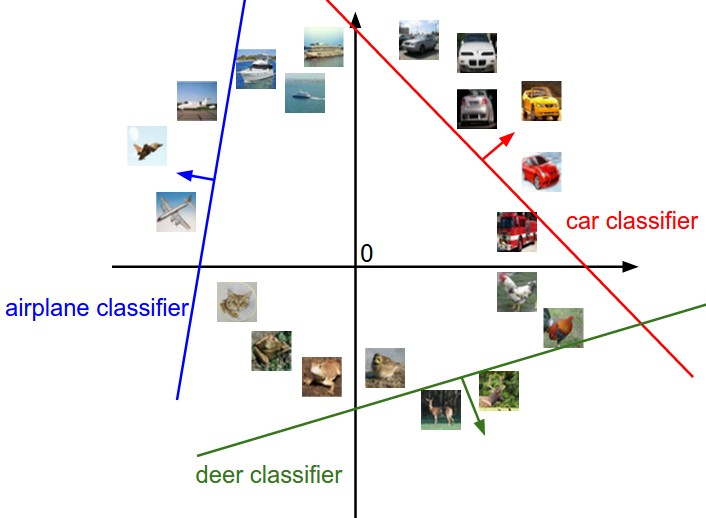

The above image illustrates an example of a linear classifier. There can be multiple types of linear classifiers each with its own properties and usefulness. In this assignment, we will cover some of them and provide you with code snippets that can be used to train each of them. We will use ``scikit-learn`` library for training the models. We will use one of the most popular dataset called the MNIST dataset for performing all the experiments.

#### Importing necessary packages for this assignment.
Lets first import the necessary packages required for this notebook.

In [4]:
# Importing Standard Libraries for data handling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# A library to measure run-time/training-time
import time

# Import the mnist and fashion mnist dataset
from keras.datasets import mnist
from keras.datasets import fashion_mnist

# Import a toy dataset from sklearn
from sklearn.datasets import make_blobs

# Saving sklearn models
import pickle

# Importing sklearn Libraries for the machine learning models
from sklearn import datasets
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import linear_model
from sklearn.metrics import classification_report, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Binary Classification

In this type of classification, the dataset consists of two classes. Thus, the labels are often defined as $0$ and $1$, or $-1$ and $1$. The input data can be images, text, points etc. As the name suggests, linear classifiers classify data into labels based on a linear combination of input features. Therefore, these classifiers separate data using a line or plane or a hyperplane (a plane in more than 2 dimensions). They can only be used to classify data that is linearly separable. We first use a toy dataset to show the effects of linear classification.

In [5]:
# Creating a sample dataset using blobs
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)

The dataset is created. Let us now plot the dataset. We use the labels present in the $y$ array to color code the samples. Samples of two different classes are shown in two distinct colors.

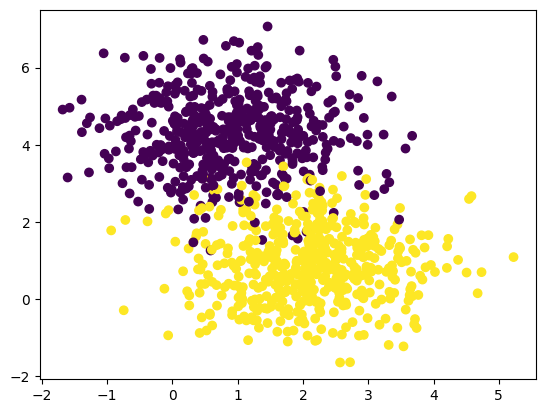

In [6]:
# Plotting the dataset
# Using the labels to color code the samples
plt.scatter(X[:,0],X[:,1], c=y);

We also split the dataset into train and test set. This will be important to measure the performance of our network. We use a random split. We also define a test set size of $10\%$ of the total dataset.

In [7]:
# Creating a train and test split for the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

We now plot the train set as well as the test set.

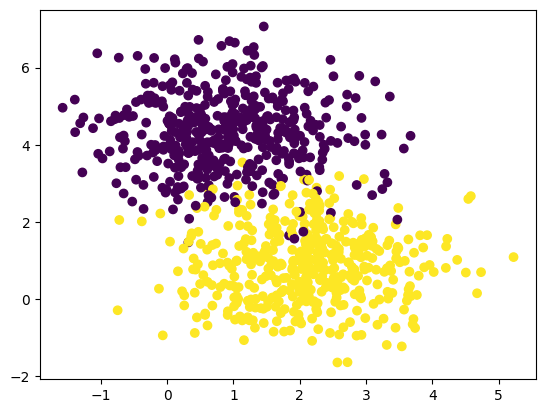

In [8]:
# Plotting the train set that we just created from the dataset
# Using the labels to color code the samples
plt.scatter(X_train[:,0],X_train[:,1], c=y_train);

The above is the plot of the train set. We also plot our test set.

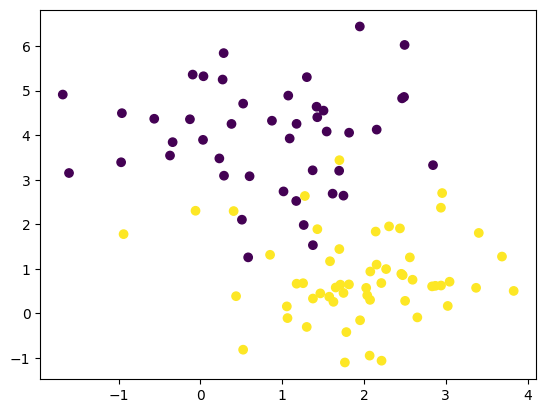

In [9]:
# Plotting the test set of the dataset
# Using the labels to color code the samples
plt.scatter(X_test[:,0], X_test[:,1], c=y_test);

We now use logistic regression classifier on this dataset to classify the two classes. We will also plot the classification boundary generated by the classifier.

### Logistic Regression
Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, more popularly called the sigmoid function was to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment.

It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$\frac{1}{ (1 + e^{-value})}$

Where $e$ is the base of the natural logarithms and value is the actual numerical value that you want to transform. Below is a plot of the numbers between $-5$ and $5$ transformed into the range $0$ and $1$ using the logistic function.



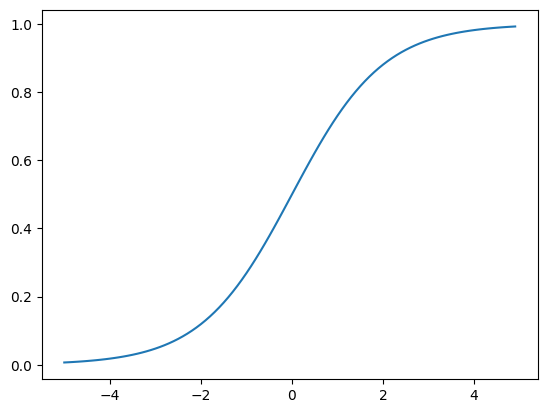

In [10]:
# Defining the sigmoid function. This will be used ONLY for plotting.
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

# The inputs from -5 to 5.
x = np.arange(-5., 5., 0.1)
sig = sigmoid(x)

plt.plot(x, sig)
plt.show()

Before we use a standard logistic regression function to train on the synthetic dataset, lets check the input shapes. The input shapes to the logistic regression traiining function is of the shape $(N, D)$. Here $N$ is the number of samples (in our case this is set to $900$ during training time). We have also $D=2$. The labels will be of the shape $(N,)$.

In [11]:
# Printing the shapes of the train data
print ("The shape of the input data: ")
print (X_train.shape)

print ("The shape of the labels of the training data: ")
print (y_train.shape)



The shape of the input data: 
(900, 2)
The shape of the labels of the training data: 
(900,)


Let us now train a logistic regression model for the generated dataset.

In [12]:
# Creating a logistic model. We keep all the parameters as default right now.
logisticregression_model = linear_model.LogisticRegression()


# Train the  logistic regression model.
logisticregression_model.fit(X_train, y_train)


# Calculate the accuracy of the model that just got trained.
acc = logisticregression_model.score(X_test, y_test)

# Print the accuracy that is given in terms of a probability ranging from 0 to 1.
print ("The accuracy of the logistic regression model on the synthetic dataset is: {}%".format(acc*100))

The accuracy of the logistic regression model on the synthetic dataset is: 91.0%


Till now we have only seen the effect of logisic regression on a sample dataset. Let us now try to train the same algorithm on a more complex dataset.

## Car Purchase Prediction

The dataset we have here belongs to a **Car company** and we have to predict that which of our previous customers will buy brand new SUV as company has launched new SUV.
And to predict this we need data on which we train classification model to predict that
which customers will buy new SUV.
The dataset contains 3 columns.

* **Age**
* **Estimated Salary**
* **Purchased - Target Variable**

In **Purchased Column** we have 2 values, 0 & 1. 0 means that customer didnot buy any SUV and 1 means
that customer have bought SUV. The customers here we are talking about are basically previous customers.

# Importing the Dataset

In [13]:
#@title Download dataset
!pip install gdown==4.5.1
!gdown "15ni9LGEsL5iapZoWouXK58dLTnk0zGff"

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14930 sha256=bc9c73dbb04e32c0548fc0fd3365ee6caeb7c002bea81222b5dc94600cc0b85a
  Stored in directory: /root/.cache/pip/wheels/38/72/83/dab5cb8321023eb1549d7a7d7f564b479ed4cf71edb70ddad6
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=15ni9LGEsL5iapZoWouXK58dLTnk0zGff
To: /content/Social_Network_Ads.csv
100% 4.90k/4.90k [00:00<00:00, 11.5MB/s]


In [14]:
 dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [15]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Splitting the dataset into Training Set and Test Set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
print(X_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [18]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [19]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [20]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


Now we are going to scale 2 given features named as **Age and Salary**. No need to scale Target variable as it is in already binary form.

# Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
print(X_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [23]:
print(X_test)

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]
 [-0.80480212 -0.59677555]
 [-1.00286662 -0.42281668]
 [-0.11157634 -0.42281668]
 [ 0.08648817  0.21503249]
 [-1.79512465  0.47597078]
 [-0.60673761  1.37475825]
 [-0.11157634  0.21503249]
 [-1.89415691  0.44697764]
 [ 1.67100423  1.75166912]
 [-0.30964085 -1.37959044]
 [-0.30964085 -0.65476184]
 [ 0.8787462   2.15757314]
 [ 0.28455268 -0.53878926]
 [ 0.8787462   1.02684052]
 [-1.49802789 -1.20563157]
 [ 1.07681071  2.07059371]
 [-1.00286662  0.50496393]
 [-0.90383437  0.30201192]
 [-0.11157634 -0.21986468]
 [-0.60673761  0.47597078]
 [-1.6960924   0.53395707]
 [-0.11157634  0.27301877]
 [ 1.86906873 -0.27785096]
 [-0.11157634 -0.48080297]
 [-1.39899564 -0.33583725]
 [-1.99318916 -0.50979612]
 [-1.59706014  0.33100506]
 

In [24]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


# Training the Logistic Regression Model on Training Set

In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

Now we have trained our **Logistic Regression Model**. Now test the cutomer with Age=30 and Salary=87000 but before puting this values in classifier we need to scale these values as well, as we have scaled our orignal values so that's why it should have exact same scaler that we have applied on **Training Data**.

In [26]:
print(classifier.predict(sc.transform([[18,97000]])))

[0]


According to the Test Data we have this customer who does not buy SUV and we can see that predicted answer is also the same, so the model did well here on this single observation of customer.

So now we're gonna move on to the next step which is predicting the test results and displaying the vector of the predictions next to the vector of the real results mean the real purchase decisions.

In [28]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


We get the two vectors next to each other with first on the left, Your vector of predictions you know of the predicted purchase decisions for all the customers. Of course the test set right. This was applied to excess here so that all the customers of the test set and on the right in the second column you have the real purchasing decisions.

And so here what's interesting to see is to compare the predicted purchase decisions to the real ones for all the customers in the test. All right so let's see for the first customer of the test. You remember that particular custoemr with age 30 and an estimated salary 87000 dollars.

Well the prediction is **NO** this customer didn't buy the new SUV and the real result is indeed **NO**.

In reality that customer didn't buy the new SUV.

As we can see that in the results that majority of the predictions are correct and also we have some incorrect predictions. Lets draw confusion matrics to check the predictions.

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [30]:
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(cnf_matrix)
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



0.89

In [31]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.summer):
    plt.clf
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',color='black',fontsize=22)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




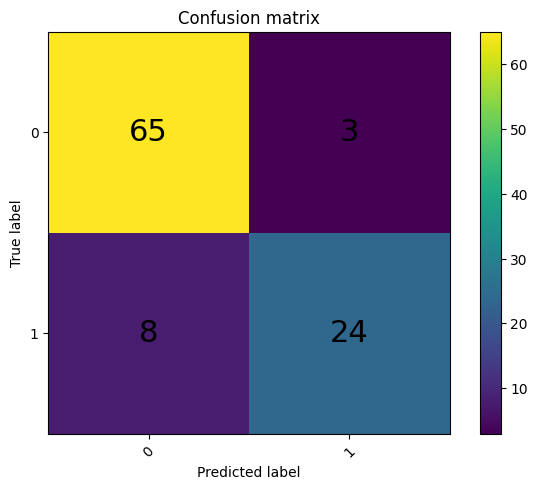

In [32]:
plot_confusion_matrix(cnf_matrix, np.unique(y_pred))

The confusion matrix showing that we have indeed **65 correct predictions** of the **class 0** meaning the customers of the test who didn't buy the new SUV then **24 Correct predictions** of the **class 1** meaning correct prediction that the customers who bought the SUV and then **3 incorrect predictions** of the **class 1** meaning **3 incorrect predictions** of the customers who in reality bought the SUV but were predicted not to. And finally **8 incorrect predictions** of the **class 0** meaning 8 customers who in reality didn't buy the SUV but were predicted to buy it.

We're going to visualize not only the training set results but also the test results. And this will be super interesting because we will actually see how the **logistic regression** classifier was actually trained to classify our customer as you know our observations in to the two different classes.

# Visualising the Training Set Results

<ipython-input-33-2b0c1aa468a5>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('yellow', 'blue'))(i), label = j)


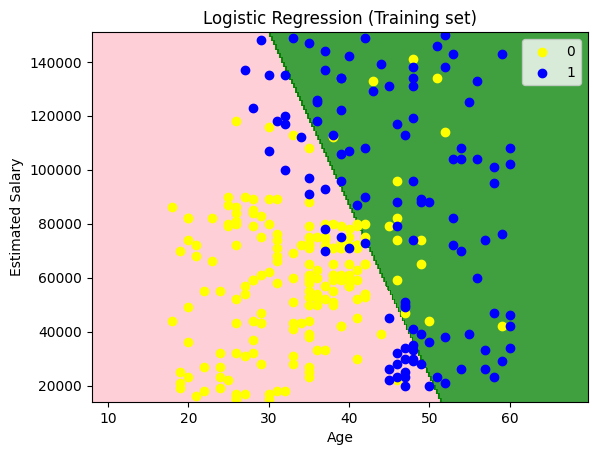

In [33]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('yellow', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test Set Results

<ipython-input-34-b012cb55b659>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('yellow', 'blue'))(i), label = j)


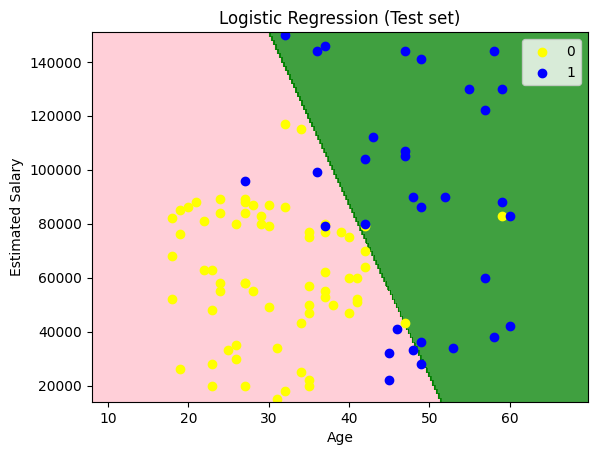

In [34]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('yellow', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

So that concludes the **Car Purchase Prediction Model** using **Logistic Regression** with the **Accuracy** of **89%**.

## Ungraded Excercise

Train a  a logistic regression based classifier  on the FASHION MNIST dataset and report the results. Report which has the maximum accuracy in this case. Also, plot the dataset (input to the model) and the predictions like shown above. We provide the code to import the dataset from the web.

In [35]:
# Loading the fashion mnist dataset for the graded excercise. Please use this code snippet to load the dataset
(train_images_fm, train_labels_fm), (test_images_fm, test_labels_fm) = fashion_mnist.load_data()
print ("The FASHION MNIST dataset is loaded and ready!")

4422102/4422102 [==============================] - 0s 0us/step
The FASHION MNIST dataset is loaded and ready!


### Please answer the questions below to complete the experiment:




In [36]:
# @title Which evaluation metric is commonly used for assessing the performance of a Logistic Regression model?. { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "Accuracy, Precision, Recall, F1-score" #@param ["","Mean Absolute Error (MAE)","R-squared", "Accuracy, Precision, Recall, F1-score", " Root Mean Squared Error (RMSE)"]

In [37]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [38]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "..It was good and challenging for me" #@param {type:"string"}


In [39]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "No" #@param ["","Yes", "No"]


In [40]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [41]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [42]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 328
Date of submission:  13 Jan 2024
Time of submission:  14:21:01
View your submissions: https://mlaias-iisc.talentsprint.com/notebook_submissions
